In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
import warnings
warnings.simplefilter('ignore')

In [2]:
data = pd.read_csv("drugss.csv")

In [3]:
data.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,70731,Abacavir / dolutegravir / lamivudine,HIV Infection,"""Thought I would be the first to post as I was...",10,11-Dec-14,76
1,94806,Abilify,Autism,"""My stepson is now 13 years old and has been o...",10,7-Feb-14,141
2,94980,Abilify,Autism,"""My 10 year old son, was on Risperdal and it w...",8,27-Aug-11,105
3,94955,Abilify,Autism,"""Abilify works wonders, but it can have long t...",10,9-Dec-09,103
4,94764,Abilify,Autism,"""After much deliberation and many, many meetin...",5,18-Nov-13,103


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11332 entries, 0 to 11331
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   uniqueID     11332 non-null  int64 
 1   drugName     11332 non-null  object
 2   condition    11332 non-null  object
 3   review       11332 non-null  object
 4   rating       11332 non-null  int64 
 5   date         11332 non-null  object
 6   usefulCount  11332 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 619.8+ KB


In [5]:
for col in data.columns:
    print("Col name : ", col, "unique percentage : ", len(data[col].unique())/len(data))

Col name :  uniqueID unique percentage :  1.0
Col name :  drugName unique percentage :  0.10095305330038828
Col name :  condition unique percentage :  0.03679844687610307
Col name :  review unique percentage :  0.7034062830921285
Col name :  rating unique percentage :  0.0008824567596187787
Col name :  date unique percentage :  0.2627073773385104
Col name :  usefulCount unique percentage :  0.020472996823155665


In [6]:
data.isnull().sum()

uniqueID       0
drugName       0
condition      0
review         0
rating         0
date           0
usefulCount    0
dtype: int64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11332 entries, 0 to 11331
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   uniqueID     11332 non-null  int64 
 1   drugName     11332 non-null  object
 2   condition    11332 non-null  object
 3   review       11332 non-null  object
 4   rating       11332 non-null  int64 
 5   date         11332 non-null  object
 6   usefulCount  11332 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 619.8+ KB


In [8]:
data.shape

(11332, 7)

In [9]:
# Combine 'condition' and 'review' columns into a single feature column
X = data['condition'] + ' ' + data['review']

# Target variable: 'drugName' or a binary variable indicating drug recommendation
Y = data['drugName']

In [10]:
# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [11]:
# Convert text data to numerical features using TF-IDF vectorization
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)  # Adjust max_features as needed
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [12]:
logreg_model = LogisticRegression()
logreg_model.fit(X_train_tfidf, Y_train)

LogisticRegression()

In [13]:
# Make predictions on the test set
Y_pred_logreg = logreg_model.predict(X_test_tfidf)

In [14]:
# Evaluate the model
accuracy = accuracy_score(Y_test, Y_pred_logreg)
print(f"Accuracy: {accuracy:}")

Accuracy: 0.2258491398323776


In [15]:
print(classification_report(Y_test, Y_pred_logreg))

                                                                   precision    recall  f1-score   support

                             Abacavir / dolutegravir / lamivudine       0.00      0.00      0.00         1
                                                          Abilify       0.00      0.00      0.00         5
                                                           Abreva       0.00      0.00      0.00         2
                                                      Acamprosate       0.00      0.00      0.00         1
                               Acetaminophen / aspirin / caffeine       0.00      0.00      0.00         2
                            Acetaminophen / butalbital / caffeine       0.00      0.00      0.00         6
                  Acetaminophen / butalbital / caffeine / codeine       0.00      0.00      0.00         1
                                          Acetaminophen / codeine       0.00      0.00      0.00         1
                                  Ac

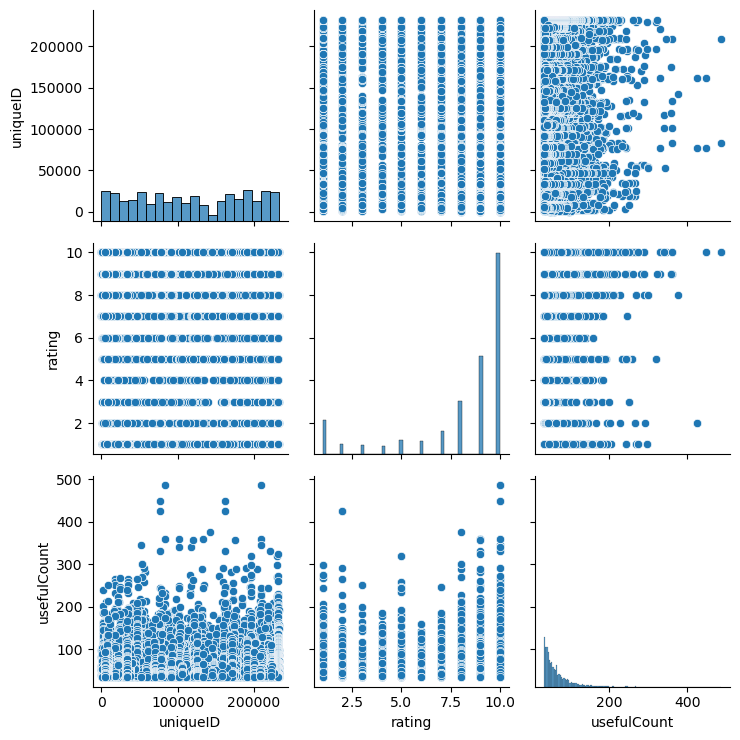

In [18]:
sns.pairplot(data)
plt.tight_layout()
plt.show()